<a href="https://colab.research.google.com/github/ekrell/shap_multiband/blob/main/PartitionSHAP_ImageNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `PartitionShap`: ImageNet (RGB) channel-wise demo

**Purpose:** This notebook compares the default implementation of `PartitionShap` to [CBI's fork](https://github.com/conrad-blucher-institute/shap) that implement's channel-wise explanations. 
That is, the default paritions images by splitting the rows and columns. Only at the pixel-level does it split across the channels/bands. For 3D inputs, it may be of interest to explain the contribution of bands on superpixel regions. 
The fork introduces the option to split first by channels, then by superpixels. This notebook also demonstrates that the choice of `masker` (how to represent features that are "not present") has a significant affect on the explanation. 

**Data:**
[ImageNet 1000](https://www.image-net.org/)

**Notebooks in series**
- `PartitionShap`: ImageNet (RGB) channel-wise demo
- `PartitionShap`: EuroSAT (RGB) channel-wise demo
- `PartitionShap`: EuroSAT (13-band) channel-wise demo

# Setup environment

In [1]:
!pip install git+https://github.com/conrad-blucher-institute/shap.git
import json
import numpy as np
import shap
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

  Cloning https://github.com/conrad-blucher-institute/shap.git to /tmp/pip-req-build-xl2oc01q
  Running command git clone -q https://github.com/conrad-blucher-institute/shap.git /tmp/pip-req-build-xl2oc01q
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=3069157 sha256=1543f64ddbf659e5473fa098666e807b3eb3a582577847d6c719e6abf653909f
  Stored in directory: /tmp/pip-ephem-wheel-cache-lyku270n/wheels/2a/df/e0/7c6260159a5c39dd54cb2dd8787410c3e14d9d9cc5345f1eb4
Successfully built shap


# Load data & pretrained model

In [2]:
# load pre-trained model and data
model = ResNet50(weights='imagenet')
X, y = shap.datasets.imagenet50()

102973440/102967424 [==============================] - 1s 0us/step


In [3]:
# getting ImageNet 1000 class names
url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
with open(shap.datasets.cache(url)) as file:
    class_names = [v[1] for v in json.load(file).values()]
#print("Number of ImageNet classes:", len(class_names))
#print("Class names:", class_names)

In [4]:
# python function to get model output; replace this function with your own model function.
def f(x):
    tmp = x.copy()
    preprocess_input(tmp)
    return model(tmp)

# Default `PartitionShap`

Partition mode 0: channels (zaxis) split last

With 500 evaluations, will never even use channel-wise masks

In [5]:
def explain_singleband(masker):
  # create an explainer with model and image masker
  explainer = shap.Explainer(f, masker, output_names=class_names)

  # here we explain two images using 500 evaluations of the underlying model to estimate the SHAP values
  shap_values = explainer(X[1:3], max_evals=500, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  # output with shap values
  shap.image_plot(shap_values)

In [24]:
# define maskers
# See masker documentation for details: 
#    https://shap.readthedocs.io/en/latest/generated/shap.maskers.Image.html#shap.maskers.Image
masker_inpaint_telea = shap.maskers.Image("inpaint_telea", X[0].shape)
masker_inpaint_ns    = shap.maskers.Image("inpaint_ns", X[0].shape)
masker_blur_3x3      = shap.maskers.Image("blur(3, 3)", X[0].shape)
masker_blur_10x10    = shap.maskers.Image("blur(10, 10)", X[0].shape)
masker_blur_100x100  = shap.maskers.Image("blur(100, 100)", X[0].shape)
masker_uniform_black = shap.maskers.Image(np.zeros_like(X[0]), X[0].shape)
masker_uniform_gray  = shap.maskers.Image(np.zeros_like(X[0]) + 128, X[0].shape)
masker_uniform_white = shap.maskers.Image(np.zeros_like(X[0]) + 255, X[0].shape)

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [02:04, 41.52s/it]


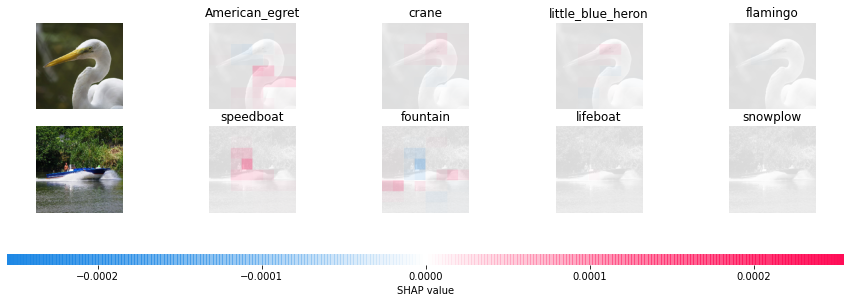

In [7]:
# Masker: inpaint telea
explain_singleband(masker_inpaint_telea)

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [02:04, 41.35s/it]


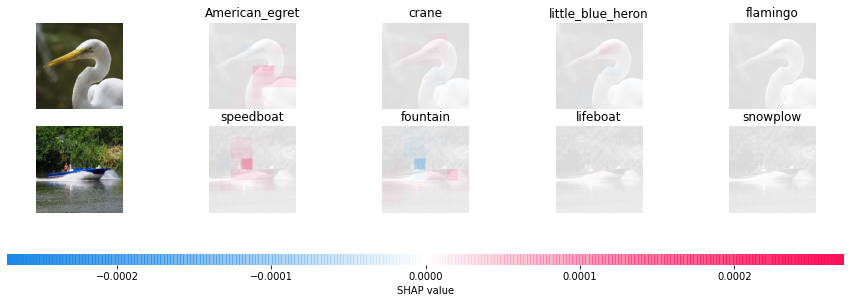

In [8]:
# Masker: inpaint NS
explain_singleband(masker_inpaint_ns)

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [01:37, 32.34s/it]


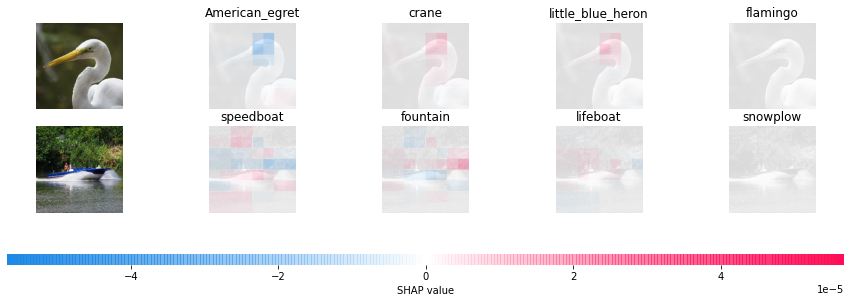

In [9]:
# Masker 3x3 blur kernel
explain_singleband(masker_blur_3x3)

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [01:36, 32.21s/it]


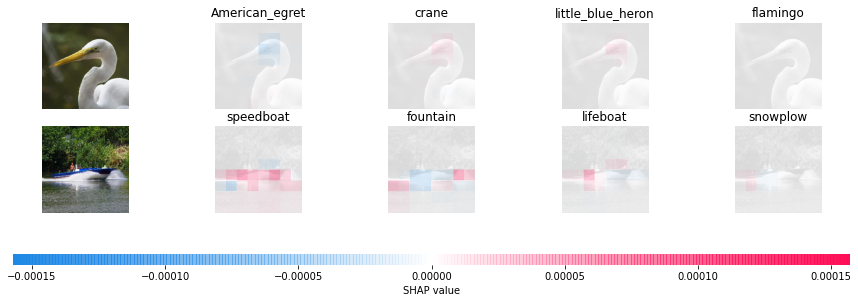

In [10]:
# Masker 10x10 blur kernel
explain_singleband(masker_blur_10x10)

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [01:36, 32.33s/it]


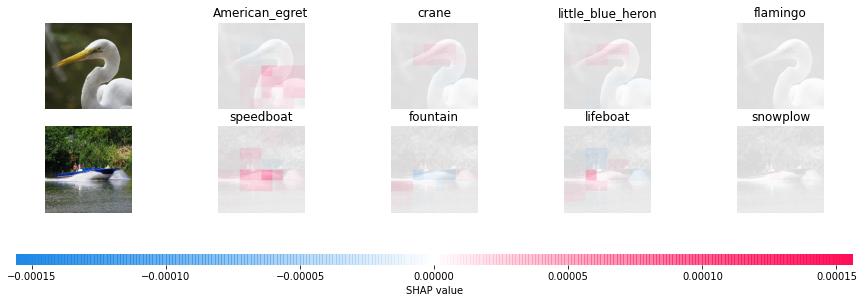

In [11]:
# Masker: 100x100 blur kernel
explain_singleband(masker_blur_100x100)

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [01:36, 32.05s/it]


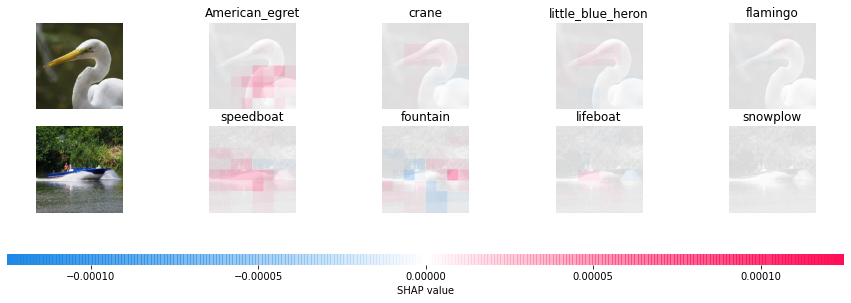

In [12]:
# Masker: black image
explain_singleband(masker_uniform_black)

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [01:36, 32.04s/it]


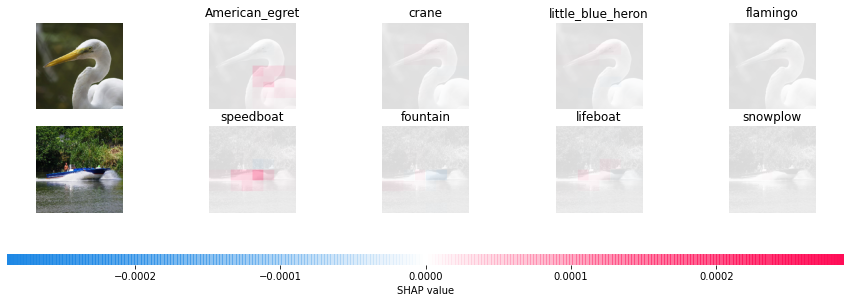

In [13]:
# Masker: gray image
explain_singleband(masker_uniform_gray)

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [01:39, 33.08s/it]


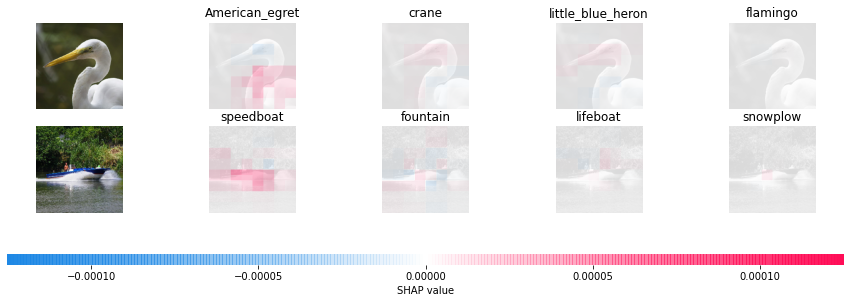

In [25]:
# Masker: white image
explain_singleband(masker_uniform_white)

# Channel-wise `PartitionShap`

Partition mode 1: channels (zaxis) split first

Break into RGB bands

In [26]:
def explain_multiband(masker):
  # create an explainer with model and image masker
  explainer = shap.Explainer(f, masker, output_names=class_names)

  # here we explain two images using 1000 evaluations of the underlying model to estimate the SHAP values
  shap_values = explainer(X[1:3], max_evals=1000, batch_size=50, outputs=shap.Explanation.argsort.flip[:4])

  # output with shap values
  shap.image_plot(shap_values, plotchannels=[0, 1, 2], hspace=0.5)

  return shap_values

In [27]:
def save_shap(shap_values, filename, Class=0):
  # Save selected SHAP values
  image0 = shap_values[0, :, :, :, Class].values
  image1 = shap_values[1, :, :, :, Class].values
  np.savez_compressed(filename, array_0=image0, array_1=image1)

In [28]:
masker_inpaint_telea = shap.maskers.Image("inpaint_telea", X[0].shape, partition_scheme=1)
masker_inpaint_ns    = shap.maskers.Image("inpaint_ns", X[0].shape, partition_scheme=1)
masker_blur_3x3      = shap.maskers.Image("blur(3, 3)", X[0].shape, partition_scheme=1)
masker_blur_10x10    = shap.maskers.Image("blur(10, 10)", X[0].shape, partition_scheme=1)
masker_blur_100x100  = shap.maskers.Image("blur(100, 100)", X[0].shape, partition_scheme=1)
masker_uniform_black = shap.maskers.Image(np.zeros_like(X[0]), X[0].shape, partition_scheme=1)
masker_uniform_gray  = shap.maskers.Image(np.zeros_like(X[0]) + 128, X[0].shape, partition_scheme=1)
masker_uniform_white = shap.maskers.Image(np.zeros_like(X[0]) + 255, X[0].shape, partition_scheme=1)

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [03:44, 74.99s/it]


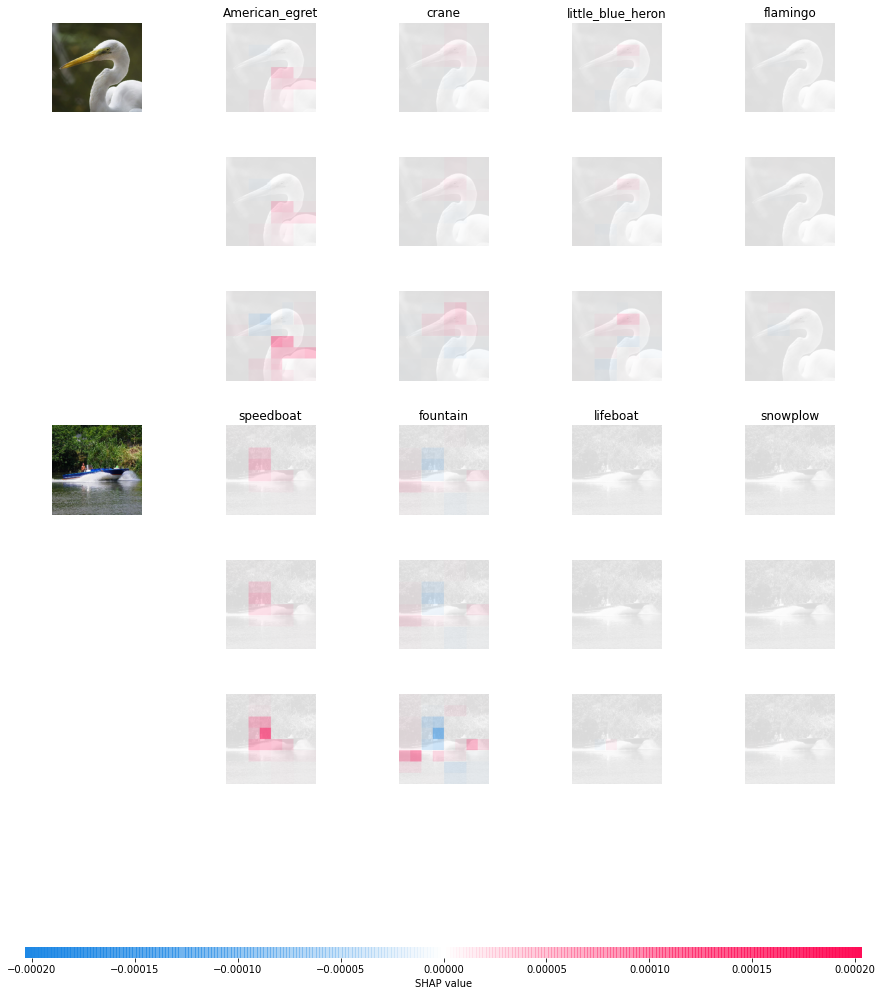

In [29]:
# Masker: inpaint telea
shap_values = explain_multiband(masker_inpaint_telea)
save_shap(shap_values, "shap_imagenet_rgb_multiband_inpaint-telea.npz")

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [03:42, 74.19s/it]


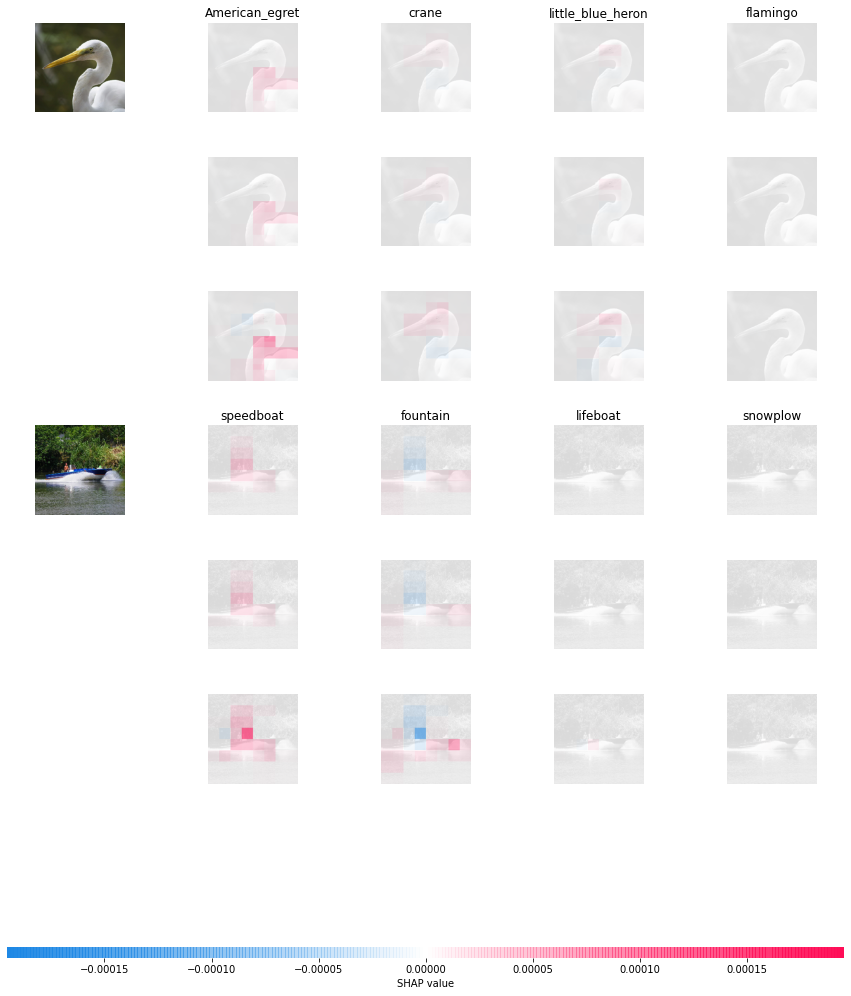

In [30]:
# Masker: inpaint NS
shap_values = explain_multiband(masker_inpaint_ns)
save_shap(shap_values, "shap_imagenet_rgb_multiband_inpaint-ns.npz")

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [02:57, 59.31s/it]


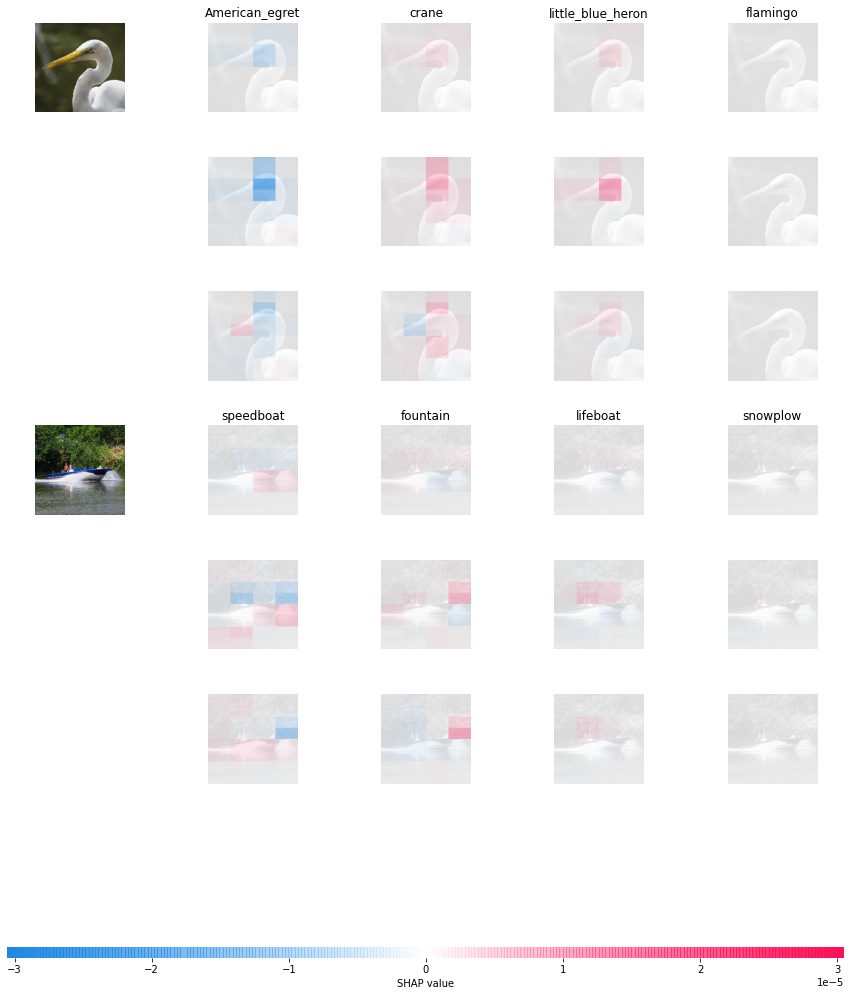

In [31]:
# Masker 3x3 blur kernel
shap_values = explain_multiband(masker_blur_3x3)
save_shap(shap_values, "shap_imagenet_rgb_multiband_blur-3x3.npz")

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [02:53, 57.71s/it]


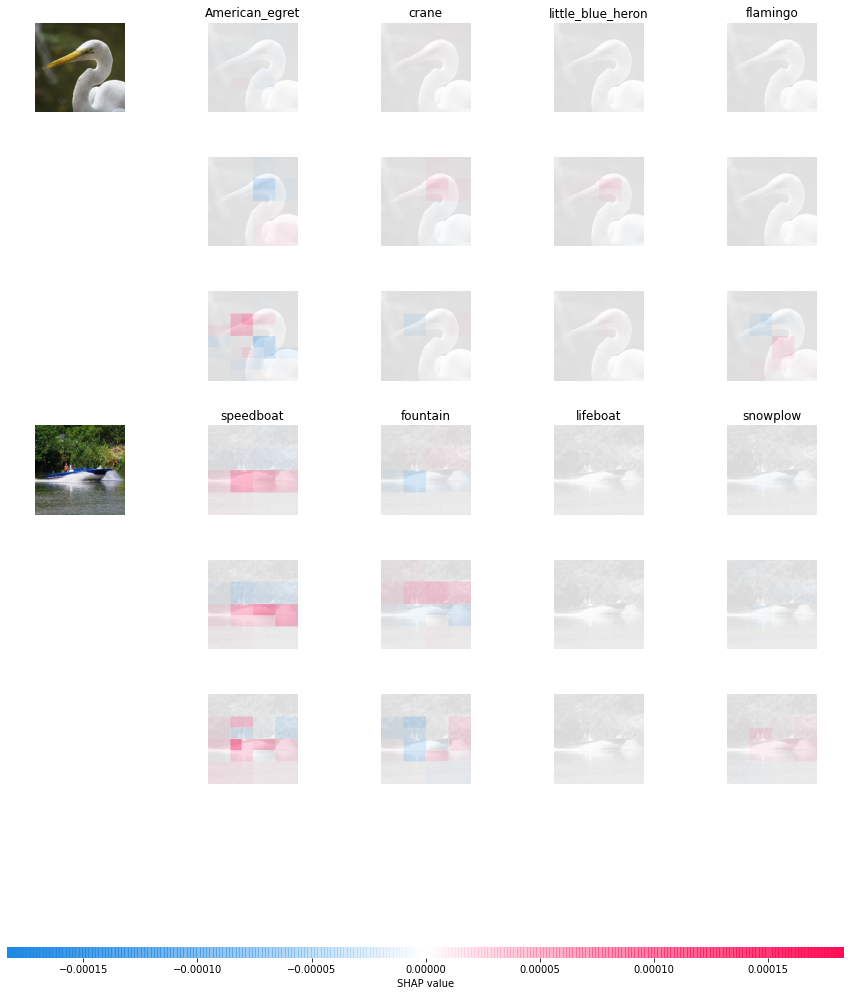

In [32]:
# Masker 10x10 blur kernel
shap_values = explain_multiband(masker_blur_10x10)
save_shap(shap_values, "shap_imagenet_rgb_multiband_blur-10x10.npz")

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [02:57, 59.28s/it]


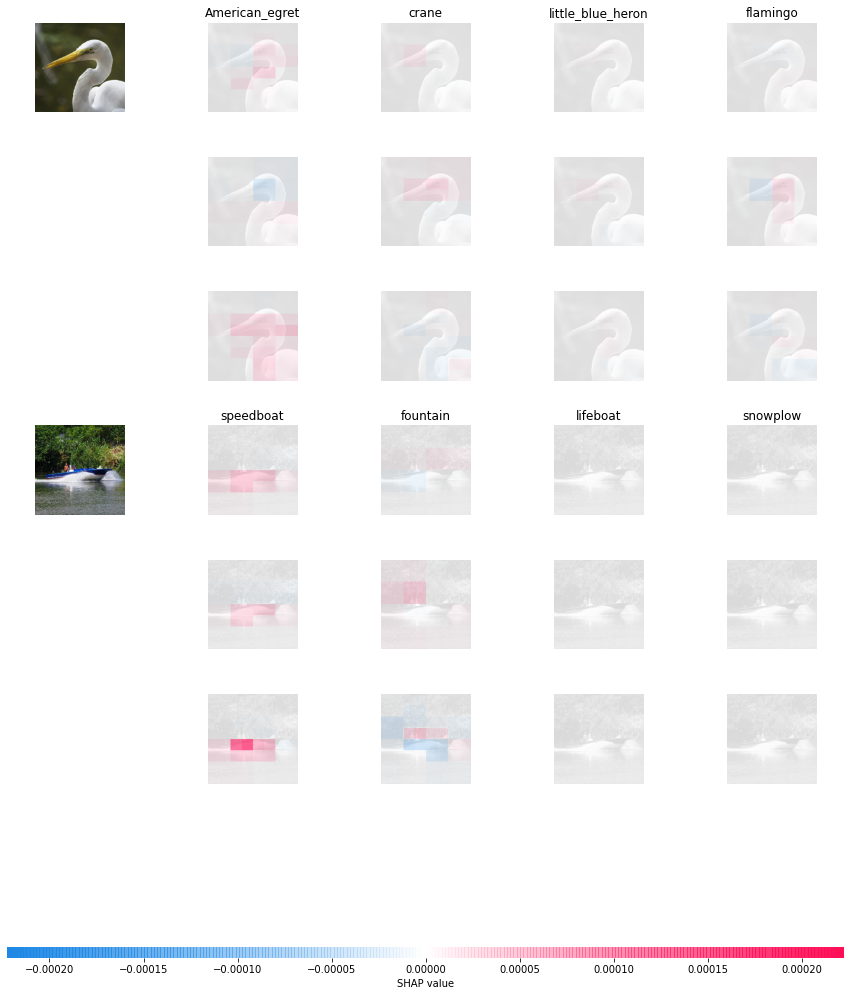

In [33]:
# Masker 100x100 blur kernel
shap_values = explain_multiband(masker_blur_100x100)
save_shap(shap_values, "shap_imagenet_rgb_multiband_blur-100x100.npz")

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [02:53, 57.82s/it]


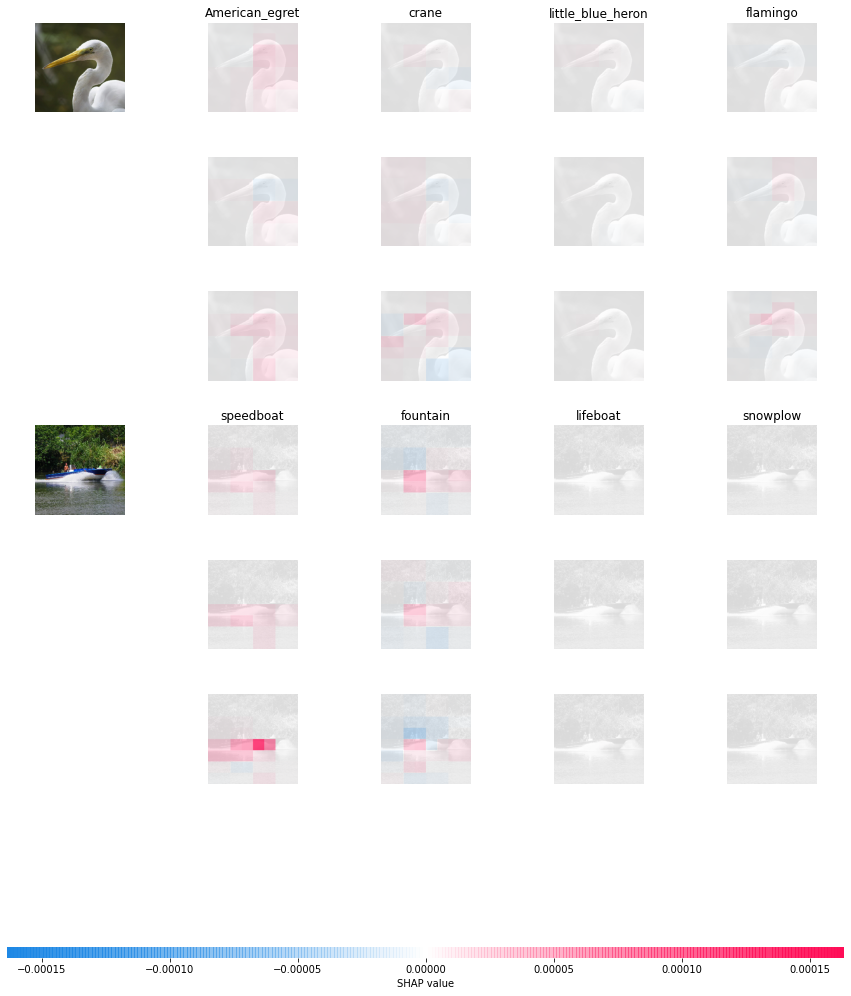

In [34]:
# Masker: black image
shap_values = explain_multiband(masker_uniform_black)
save_shap(shap_values, "shap_imagenet_rgb_multiband_uniform-black.npz")

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [02:56, 58.93s/it]


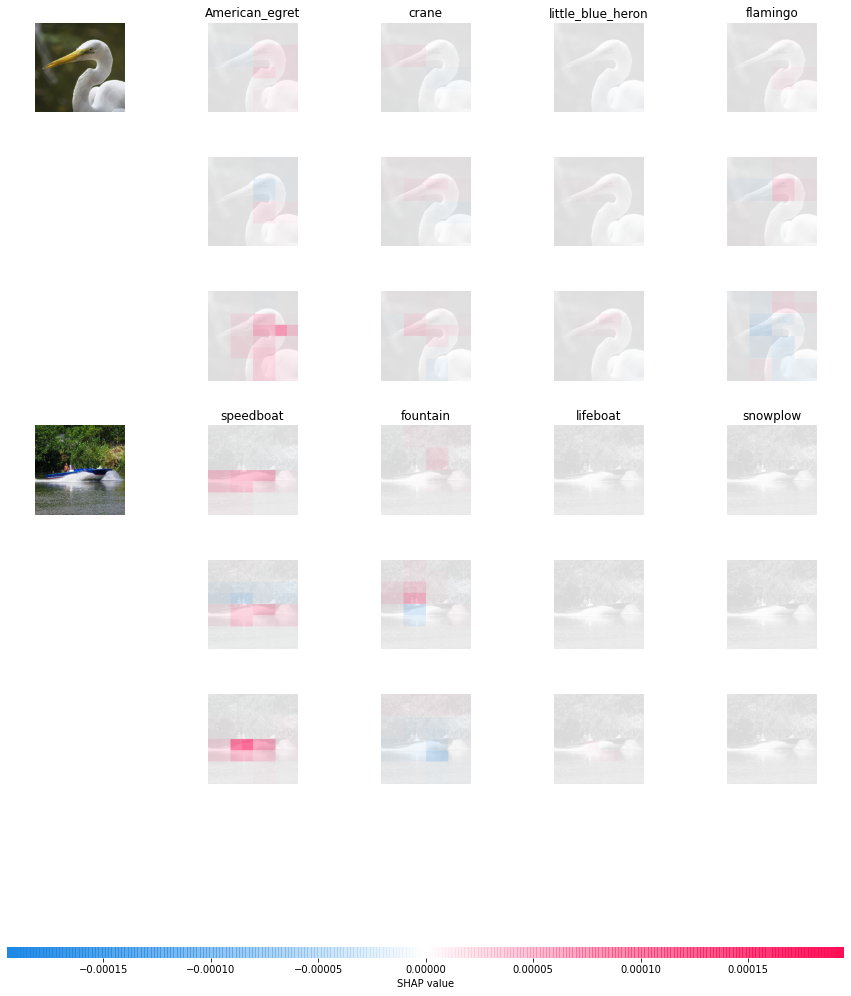

In [35]:
# Masker: gray image
shap_values = explain_multiband(masker_uniform_gray)
save_shap(shap_values, "shap_imagenet_rgb_multiband_uniform-gray.npz")

Partition explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

Partition explainer: 3it [02:54, 58.30s/it]


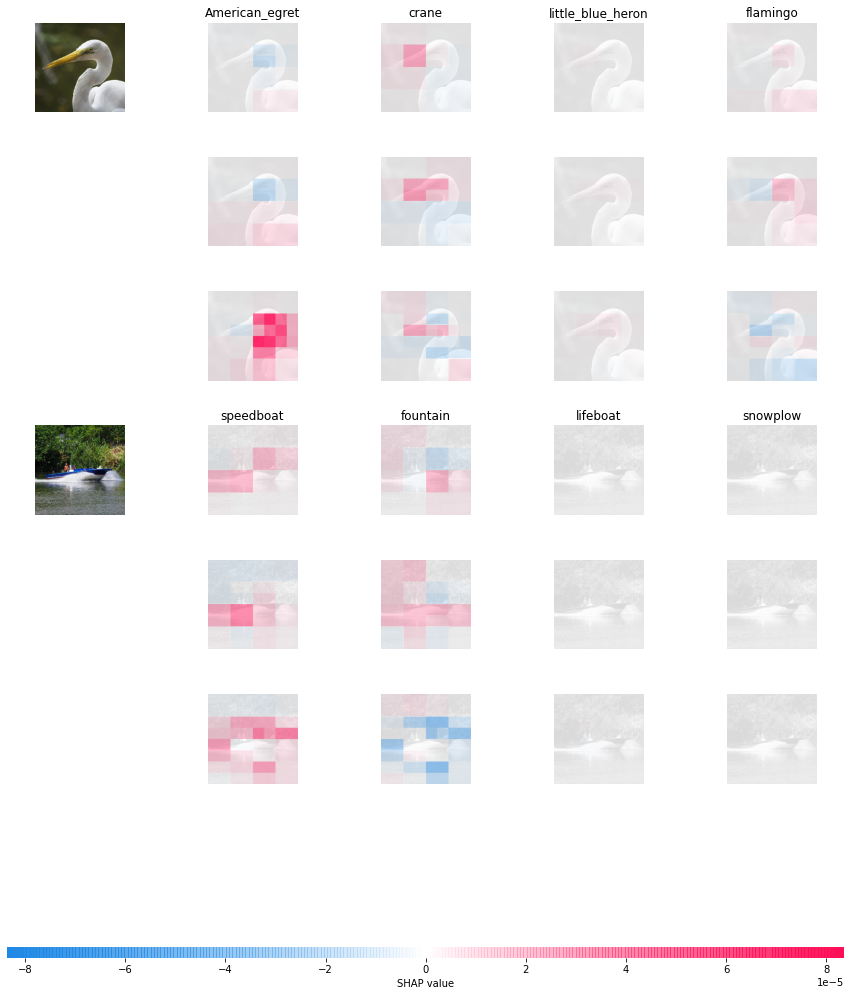

In [36]:
# Masker: white image
shap_values = explain_multiband(masker_uniform_white)
save_shap(shap_values, "shap_imagenet_rgb_multiband_uniform-white.npz")